In [ ]:
import numpy as np
from skimage.segmentation import slic
import matplotlib.pyplot as plt
from PIL import Image

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


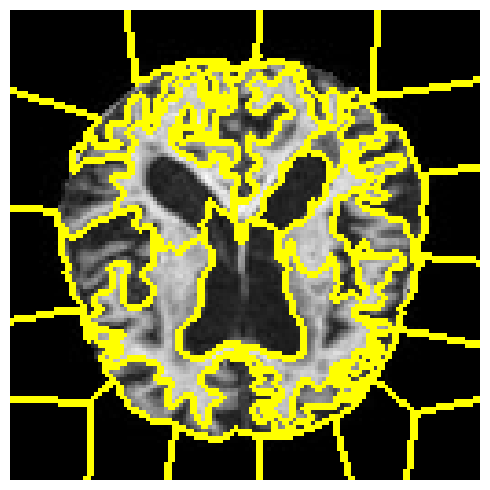

In [ ]:
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.io import imread
import matplotlib.pyplot as plt

# Load your MRI scan here
mri_scan = imread('/content/drive/My Drive/10_Samples_MRI/Mild/Copy of mild_688.jpg')

# Convert the MRI scan to a floating point type if not already
mri_scan_float = mri_scan.astype('float') / mri_scan.max()

# Perform SLIC superpixel segmentation with adjusted parameters
segments = slic(mri_scan_float, n_segments=30, compactness=0.1, sigma=1, start_label=1)

# Visualize the SLIC boundaries on the MRI scan
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(mark_boundaries(mri_scan, segments))
ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Remove the batch dimension and average across the color channels
shap_values = shap_values.squeeze()  # This changes shape from (1, 128, 128, 3) to (128, 128, 3)
shap_values = np.mean(shap_values, axis=-1)  # Average across the color channels to get (128, 128)


NameError: name 'shap_values' is not defined

In [ ]:
print("Shape of SHAP values:", shap_values.shape)
print("Shape of MRI scan segments:", segments.shape)



NameError: name 'shap_values' is not defined

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

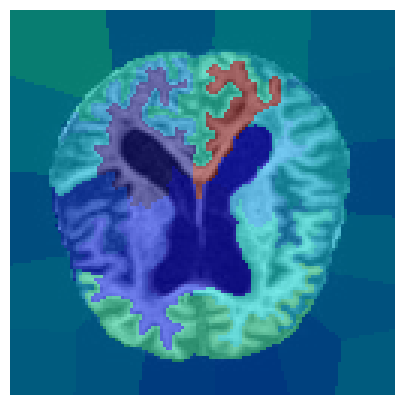

In [ ]:
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.io import imread
import matplotlib.pyplot as plt

# Load your MRI scan here
mri_scan = imread('/content/drive/My Drive/10_Samples_MRI/Mild/Copy of mild_688.jpg')

# Convert the MRI scan to a floating point type if not already
mri_scan_float = mri_scan.astype('float') / mri_scan.max()

# Perform SLIC superpixel segmentation with adjusted parameters
segments = slic(mri_scan_float, n_segments=30, compactness=0.1, sigma=1, start_label=1)

# Load the SHAP values (add the correct path for your SHAP values file)
shap_values_path = '/content/drive/My Drive/SHAPvalues/Copy of mild_688.npy'
shap_values = np.load(shap_values_path)

# Reshape SHAP values to match the MRI scan's dimensions
shap_values = shap_values.squeeze()  # Remove the singleton batch dimension
shap_values = np.mean(shap_values, axis=-1)  # Average across the color channels

# Ensure the SHAP values have the same shape as the MRI scan segments
if shap_values.shape != segments.shape:
    raise ValueError('The shape of SHAP values does not match the MRI scan segments.')

# Aggregate SHAP values within each superpixel segment
segment_shap_values = np.zeros(np.max(segments) + 1)
for segment_label in np.unique(segments):
    mask = segments == segment_label
    segment_shap_values[segment_label] = np.mean(shap_values[mask])

# Map the aggregated SHAP values back to the superpixel segments
shap_mapped_segments = segment_shap_values[segments]

# Visualize the aggregated SHAP values overlayed on the MRI scan
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(mri_scan_float, cmap='gray')
ax.imshow(shap_mapped_segments, cmap='jet', alpha=0.5)  # Overlay with transparency
ax.axis('off')
plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
norm = Normalize(vmin=segment_shap_values.min(), vmax=segment_shap_values.max())
cmap = plt.get_cmap('jet')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(mri_scan_float, cmap='gray')
shap_overlay = ax.imshow(shap_mapped_segments, cmap=cmap, alpha=0.5, norm=norm)  # Overlay with transparency
ax.axis('off')

# Add a colorbar to the plot
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Mean SHAP Value')

plt.tight_layout()
plt.show()

NameError: name 'Normalize' is not defined

<ipython-input-7-5d4055c69a7f>:58: RuntimeWarning: invalid value encountered in log
  text = f"{np.log(segment_shap_values[segment_label] + 1e-10):.2f}"  # Logarithmic scale with small epsilon


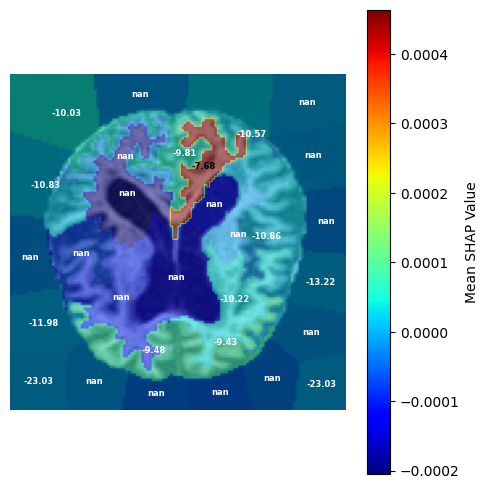

In [ ]:
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable



# Convert the MRI scan to a floating point type if not already
mri_scan_float = mri_scan.astype('float') / mri_scan.max()

# Perform SLIC superpixel segmentation with adjusted parameters
segments = slic(mri_scan_float, n_segments=30, compactness=0.1, sigma=1, start_label=1)

# Load the SHAP values (add the correct path for your SHAP values file)
shap_values_path = '/content/drive/My Drive/SHAPvalues/Copy of mild_688.npy'
shap_values = np.load(shap_values_path)

# Reshape SHAP values to match the MRI scan's dimensions
shap_values = shap_values.squeeze()  # Remove the singleton batch dimension
shap_values = np.mean(shap_values, axis=-1)  # Average across the color channels

# Ensure the SHAP values have the same shape as the MRI scan segments
if shap_values.shape != segments.shape:
    raise ValueError('The shape of SHAP values does not match the MRI scan segments.')

# Aggregate SHAP values within each superpixel segment
segment_shap_values = np.zeros(np.max(segments) + 1)
for segment_label in np.unique(segments):
    mask = segments == segment_label
    segment_shap_values[segment_label] = np.mean(shap_values[mask])

# Map the aggregated SHAP values back to the superpixel segments
shap_mapped_segments = segment_shap_values[segments]

# Create a color map for the SHAP values
cmap = plt.get_cmap('jet')

# Normalize the aggregated SHAP values for better visualization
norm = Normalize(vmin=segment_shap_values.min(), vmax=segment_shap_values.max())
normed_shap_values = norm(segment_shap_values)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(mri_scan_float, cmap='gray')
shap_overlay = ax.imshow(shap_mapped_segments, cmap=cmap, alpha=0.5, norm=norm)  # Overlay with transparency
ax.axis('off')

# Annotate the mean SHAP value for each segment
for segment_label in np.unique(segments):
    mask = segments == segment_label
    # Get the center of mass for the segment
    y, x = np.argwhere(mask).mean(axis=0)
    # Determine text color based on segment's color for better contrast
    color = 'white' if np.mean(shap_mapped_segments[mask]) < (shap_mapped_segments.max() / 2) else 'black'
    # Format the SHAP value with scientific notation
    text = f"{np.log(segment_shap_values[segment_label] + 1e-10):.2f}"  # Logarithmic scale with small epsilon
    ax.text(x, y, text, ha='center', va='center', color=color, fontsize=6, weight='bold')

# Add a colorbar to the plot
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Mean SHAP Value')

plt.tight_layout()
plt.show()


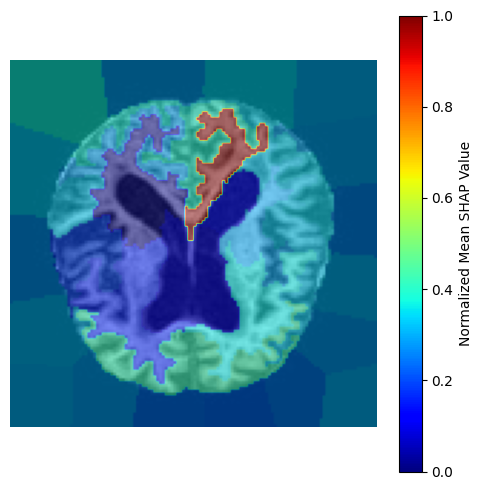

In [ ]:
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Load your MRI scan here


# Convert the MRI scan to a floating point type if not already
mri_scan_float = mri_scan.astype('float') / mri_scan.max()

# Perform SLIC superpixel segmentation with adjusted parameters
segments = slic(mri_scan_float, n_segments=30, compactness=0.1, sigma=1, start_label=1)

# Load the SHAP values (add the correct path for your SHAP values file)
shap_values_path = '/content/drive/My Drive/SHAPvalues/Copy of mild_688.npy'
shap_values = np.load(shap_values_path)

# Reshape SHAP values to match the MRI scan's dimensions
shap_values = shap_values.squeeze()  # Remove the singleton batch dimension
shap_values = np.mean(shap_values, axis=-1)  # Average across the color channels

# Ensure the SHAP values have the same shape as the MRI scan segments
if shap_values.shape != segments.shape:
    raise ValueError('The shape of SHAP values does not match the MRI scan segments.')

# Aggregate SHAP values within each superpixel segment
segment_shap_values = np.zeros(np.max(segments) + 1)
for segment_label in np.unique(segments):
    mask = segments == segment_label
    shap_values_masked = shap_values[mask]
    if np.isnan(shap_values_masked).all():
        # Assign the mean SHAP value of the entire scan to segments with NaN values
        segment_shap_values[segment_label] = np.nanmean(shap_values)
    else:
        segment_shap_values[segment_label] = np.nanmean(shap_values_masked)

# Map the aggregated SHAP values back to the superpixel segments
shap_mapped_segments = segment_shap_values[segments]

# Normalize the aggregated SHAP values for better visualization
shap_mapped_segments = (shap_mapped_segments - np.min(shap_mapped_segments)) / (np.max(shap_mapped_segments) - np.min(shap_mapped_segments))

# Create a color map for the SHAP values
cmap = plt.get_cmap('jet')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(mri_scan_float, cmap='gray')
shap_overlay = ax.imshow(shap_mapped_segments, cmap=cmap, alpha=0.5)  # Overlay with transparency
ax.axis('off')

# Add a colorbar to the plot
cbar = plt.colorbar(ScalarMappable(norm=Normalize(vmin=0, vmax=1), cmap=cmap), ax=ax)
cbar.set_label('Normalized Mean SHAP Value')

plt.tight_layout()
plt.show()


In [ ]:
# ... [previous code for loading and processing the MRI scan] ...
from skimage.filters import threshold_otsu
# Create the brain mask
thresh = threshold_otsu(mri_scan_float)
brain_mask = mri_scan_float > thresh

# Apply the brain mask to the SHAP values
shap_values_masked = np.where(brain_mask, shap_values, 0)

# Aggregate SHAP values within each superpixel segment
segment_shap_values_masked = np.zeros(np.max(segments) + 1)
for segment_label in np.unique(segments):
    mask = segments == segment_label
    segment_shap_values_masked[segment_label] = np.mean(shap_values_masked[mask])

# Map the masked aggregated SHAP values back to the superpixel segments
shap_mapped_segments_masked = segment_shap_values_masked[segments]

# Visualize the MRI scan with the masked overlay of the SHAP values
# ... [visualization code using shap_mapped_segments_masked] ...
